# Load dataset

## SWiPE - full

In [1]:
from datasets import Dataset, DatasetDict
import pandas as pd

train_df = pd.read_json('../data/swipe/swipe_train.json')
val_df = pd.read_json('../data/swipe/swipe_val.json')
test_id_df = pd.read_json('../data/swipe/swipe_test_id.json')
test_ood_df = pd.read_json('../data/swipe/swipe_test_ood.json')

train_dataset = Dataset.from_pandas(train_df[['r_content', 's_content','annotations','edits']])
val_dataset = Dataset.from_pandas(val_df[['r_content', 's_content','annotations','edits']])
test_id_dataset = Dataset.from_pandas(test_id_df[['r_content', 's_content','annotations','edits']])
test_ood_dataset = Dataset.from_pandas(test_ood_df[['r_content', 's_content','annotations','edits']])

swipe_full_dataset = DatasetDict({
    'train': train_dataset,
    'validation': val_dataset,
    'test_id': test_id_dataset,
    'test_ood': test_ood_dataset
})

## SWIPE - cleaned

In [1]:
from datasets import load_from_disk

swipe_clean_dataset = load_from_disk("../data/swipe_clean_annotated")
swipe_clean_dataset

DatasetDict({
    train: Dataset({
        features: ['r_content', 's_content', 'annotations', 'edits'],
        num_rows: 3861
    })
    validation: Dataset({
        features: ['r_content', 's_content', 'annotations', 'edits'],
        num_rows: 479
    })
    test_id: Dataset({
        features: ['r_content', 's_content', 'annotations', 'edits'],
        num_rows: 483
    })
    test_ood: Dataset({
        features: ['r_content', 's_content', 'annotations', 'edits'],
        num_rows: 368
    })
})

In [9]:
import random

sample = random.choice(swipe_dataset['train'])
print("Edits: ", sample["edits"], end='\n\n')
print("Annotations: ",sample["annotations"])

Edits:  [{'BI': 'B', 'N_words': 31, 'delete': None, 'idx': 0, 'insert': 'Centuries: 19th century - 20th century - 21st century Decades: 1940s 1950s 1960s 1970s 1980s - 1990s - 2000s 2010s 2020s 2030s 2040s 2050s Years: 1992 1993 1994 1995 1996 -', 'text': None, 'type': 'insert'}, {'BI': 'O', 'N_words': 1, 'delete': None, 'idx': 1, 'insert': None, 'text': '1997', 'type': 'equal'}, {'BI': 'I', 'N_words': 16, 'delete': None, 'idx': 2, 'insert': '- 1998 1999 2000 2001 2002 2003 2004 1997 is a year in the 19th century.', 'text': None, 'type': 'insert'}, {'BI': 'B', 'N_words': 2, 'delete': None, 'idx': 3, 'insert': ' It', 'text': None, 'type': 'insert'}, {'BI': 'O', 'N_words': 4, 'delete': None, 'idx': 4, 'insert': None, 'text': 'is a common year', 'type': 'equal'}, {'BI': 'B', 'N_words': 7, 'delete': 'starting on Wednesday of the Gregorian calendar', 'idx': 5, 'insert': None, 'text': None, 'type': 'delete'}, {'BI': 'O', 'N_words': 1, 'delete': None, 'idx': 6, 'insert': None, 'text': '.', 't

# Check text lengths

In [3]:
def calculate_mean_median_text_lengths(dataset_dict):
    lengths = {}

    for split, dataset in dataset_dict.items():
        lengths[split] = [len(example['r_content'].split()) for example in dataset]  # text lengths (in words)

    mean_median_lengths = {
        split: {
            'mean': sum(lengths[split]) / len(lengths[split]),
            'median': sorted(lengths[split])[len(lengths[split]) // 2]
        }
        for split in lengths
    }
    
    return mean_median_lengths

In [5]:
print("SWiPE - full: ", calculate_mean_median_text_lengths(swipe_full_dataset), end='\n\n' )

SWiPE - full:  {'train': {'mean': 137.83113183113184, 'median': 83}, 'validation': {'mean': 119.01244813278008, 'median': 87}, 'test_id': {'mean': 116.85330578512396, 'median': 82}, 'test_ood': {'mean': 176.84350132625994, 'median': 137}}



In [8]:
print("SWiPE - cleaned: ", calculate_mean_median_text_lengths(swipe_clean_dataset), end='\n\n' )

SWiPE - cleaned:  {'train': {'mean': 137.83113183113184, 'median': 83}, 'validation': {'mean': 116.35281837160751, 'median': 86}, 'test_id': {'mean': 117.04761904761905, 'median': 82}, 'test_ood': {'mean': 174.8858695652174, 'median': 139}}



In [7]:
def count_texts_over_word_limit(dataset_dict, column, word_limit=512):
    word_count = {}

    for split in dataset_dict:
        dataset = dataset_dict[split]
        count_over_limit = 0

        for example in dataset:
            num_words = len(example[column].split())  # Counting words by splitting on spaces
            if num_words > word_limit:
                count_over_limit += 1

        word_count[split] = count_over_limit

    return word_count

In [11]:
print("SWiPE -full: ", count_texts_over_word_limit(swipe_full_dataset, column='r_content', word_limit=512))

SWiPE -full:  {'train': 33, 'validation': 5, 'test_id': 3, 'test_ood': 12}


In [12]:
print("SWiPE - cleaned: ", count_texts_over_word_limit(swipe_clean_dataset, column='r_content', word_limit=512))

SWiPE - cleaned:  {'train': 33, 'validation': 4, 'test_id': 3, 'test_ood': 10}


In [8]:
print("SWiPE - cleaned: ", count_texts_over_word_limit(swipe_clean_dataset, column='r_content', word_limit=1024))

SWiPE - cleaned:  {'train': 2, 'validation': 0, 'test_id': 0, 'test_ood': 0}


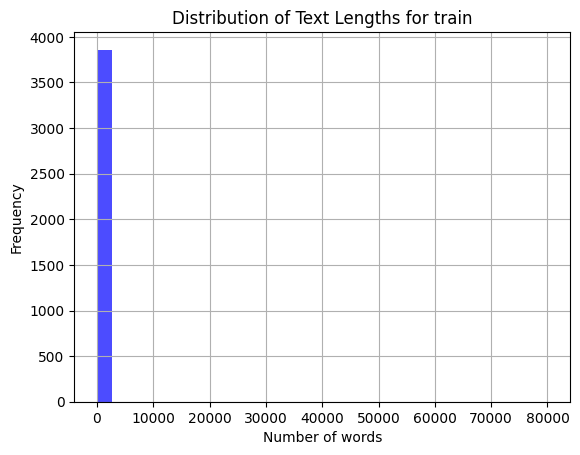

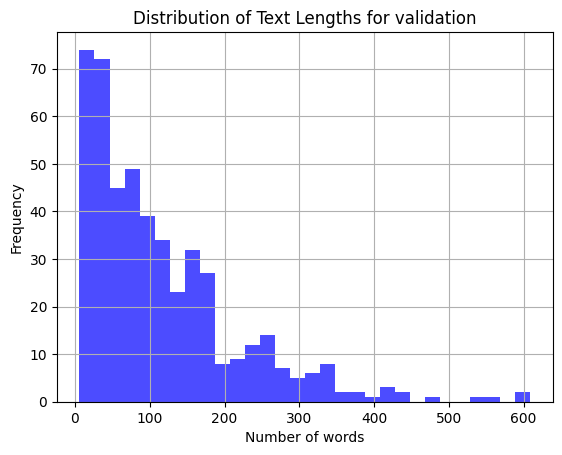

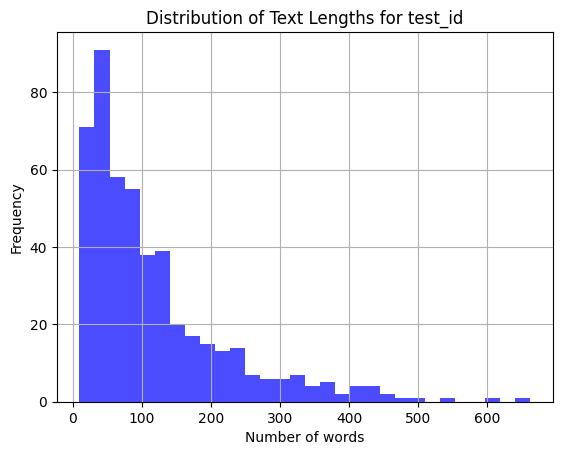

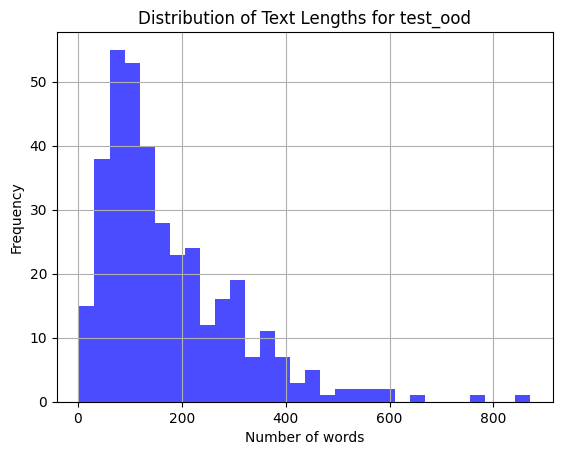

In [9]:
import matplotlib.pyplot as plt

def show_dist_text_lengths(dataset_dict):
    lengths = {}
    
    for split, dataset in dataset_dict.items():
        lengths[split] = [len(example['r_content'].split()) for example in dataset]  # text lengths (in words)
    
    # and median
    mean_median_lengths = {
        split: {
            'mean': sum(lengths[split]) / len(lengths[split]),
            'median': sorted(lengths[split])[len(lengths[split]) // 2]
        }
        for split in lengths
    }
    
    for split, text_lengths in lengths.items():
        plt.figure()
        plt.hist(text_lengths, bins=30, alpha=0.7, color='blue')
        plt.title(f"Distribution of Text Lengths for {split}")
        plt.xlabel("Number of words")
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.show()

show_dist_text_lengths(swipe_clean_dataset)

# All simplification types

## Extract unique categories

In [11]:
from collections import defaultdict

def extract_categories(dataset):
    categories = set()
    for example in dataset:
        for annotation in example['annotations']:
            categories.add(annotation['category'])
    return categories

all_categories = set()

all_categories.update(extract_categories(swipe_dataset['train']))

all_categories = sorted(list(all_categories))
print("Num of categories: ", len(all_categories))
print(all_categories)

Num of categories:  19
['discourse_anaphora_insertion', 'discourse_anaphora_resolution', 'discourse_reordering', 'lexical_entity', 'lexical_generic', 'nonsim_extraneous_information', 'nonsim_fact_correction', 'nonsim_format', 'nonsim_general', 'nonsim_noise_deletion', 'semantic_deletion', 'semantic_elaboration_background', 'semantic_elaboration_example', 'semantic_elaboration_generic', 'semantic_hypernymy', 'syntactic_deletion', 'syntactic_generic', 'syntactic_sentence_fusion', 'syntactic_sentence_splitting']


## Category distributions

In [26]:
def plot_dist(counts, dataset_type):

    plt.figure(figsize=(12, 6))
    plt.bar(combined_counts.keys(), combined_counts.values(), color='skyblue')
    plt.xticks(rotation=90)
    plt.title(f'Number of Texts per Annotation Category - {dataset_type}')
    plt.xlabel('Annotation Categories')
    plt.ylabel('Number of Texts')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [16]:
import matplotlib.pyplot as plt

def count_annotations(dataset, categories):
    category_count = defaultdict(int)
    for example in dataset:
        if example['annotations']: 
            for annotation in example['annotations']:
                category_count[annotation['category']] += 1
    return category_count

# annotations in each dataset
train_counts = count_annotations(swipe_dataset['train'], all_categories)
val_counts = count_annotations(swipe_dataset['validation'], all_categories)
test_id_counts = count_annotations(swipe_dataset['test_id'], all_categories)
test_ood_counts = count_annotations(swipe_dataset['test_ood'], all_categories)

In [17]:
# combine counts from all datasets
combined_counts = defaultdict(int)
for category in all_categories:
    combined_counts[category] = (train_counts[category] + 
                                 val_counts[category] + 
                                 test_id_counts[category] + 
                                 test_ood_counts[category])

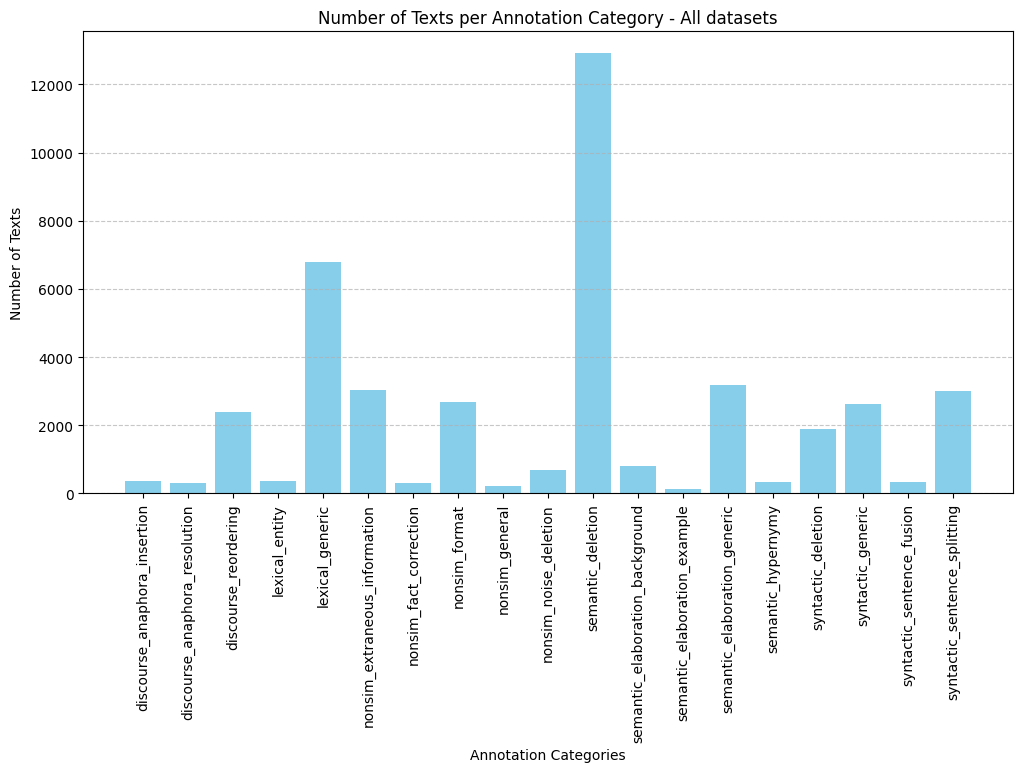

In [34]:
plot_dist(combined_counts,"All datasets")

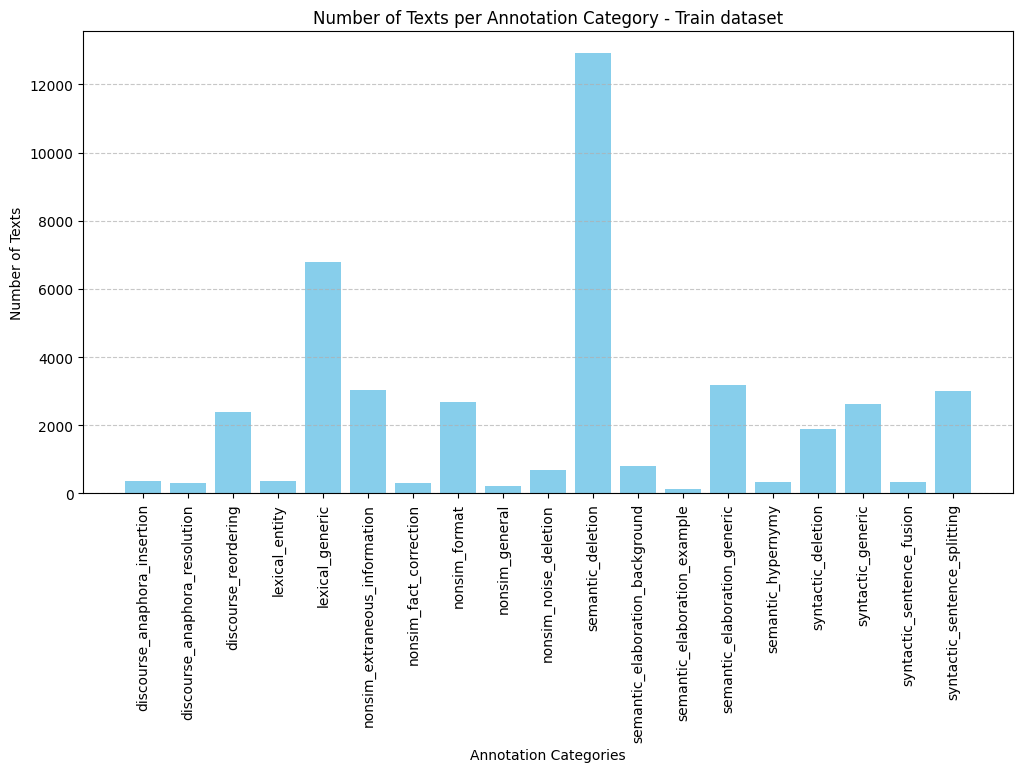

In [27]:
plot_dist(train_counts,"Train dataset")

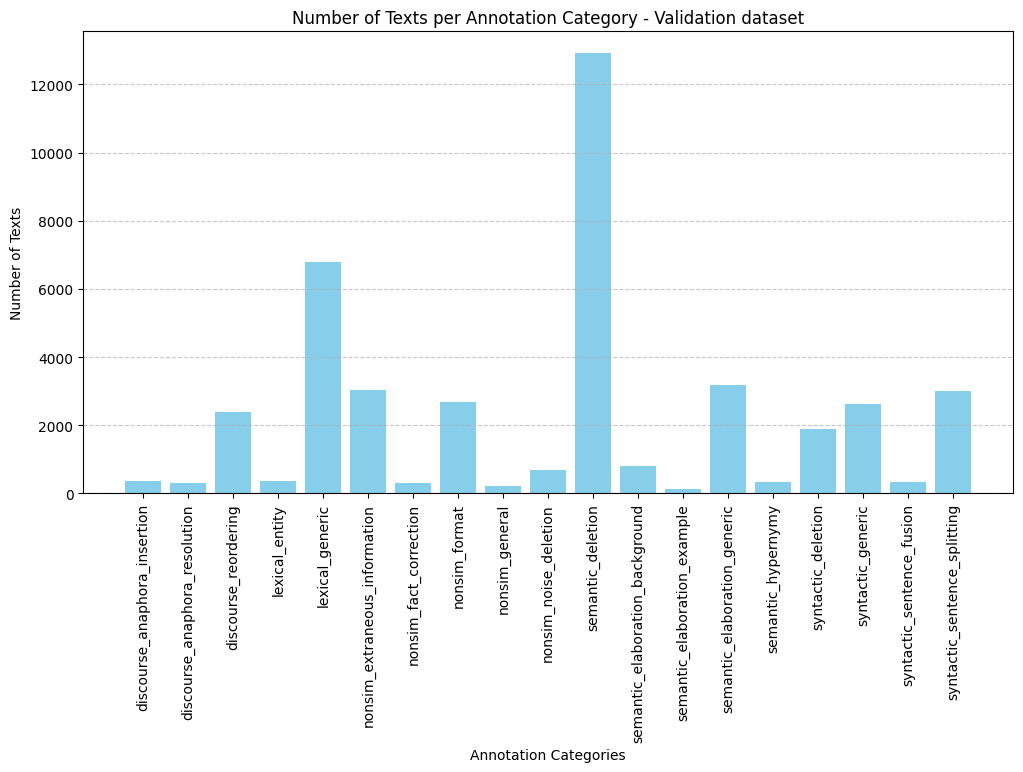

In [28]:
plot_dist(val_counts,"Validation dataset")

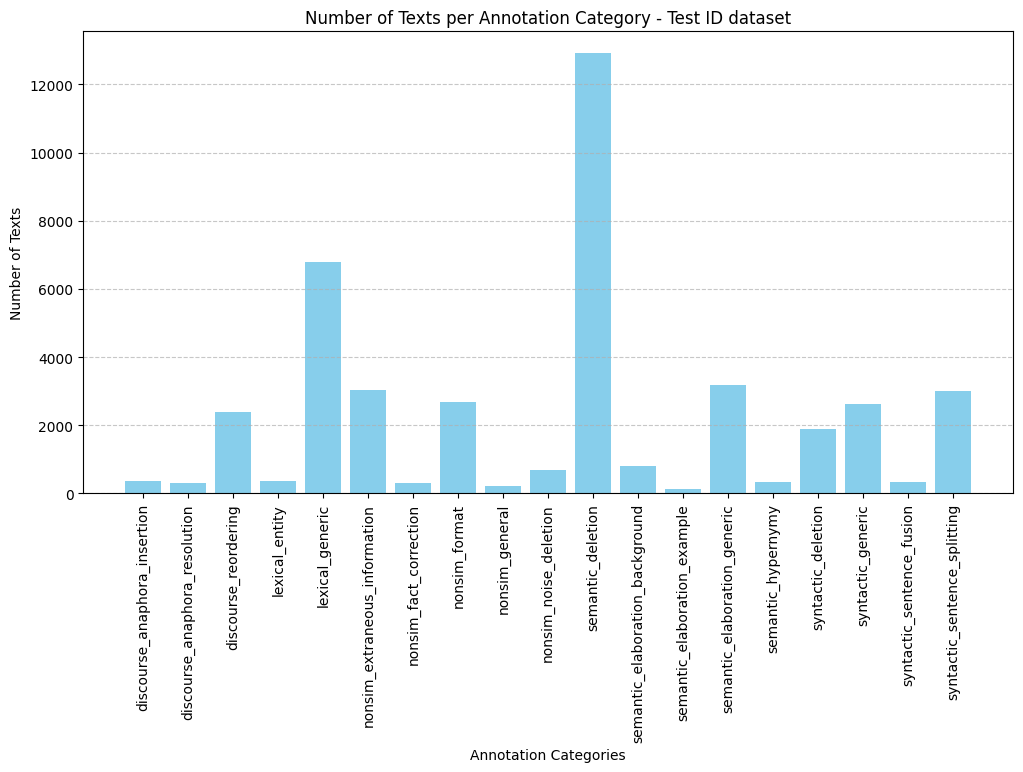

In [29]:
plot_dist(test_id_counts,"Test ID dataset")

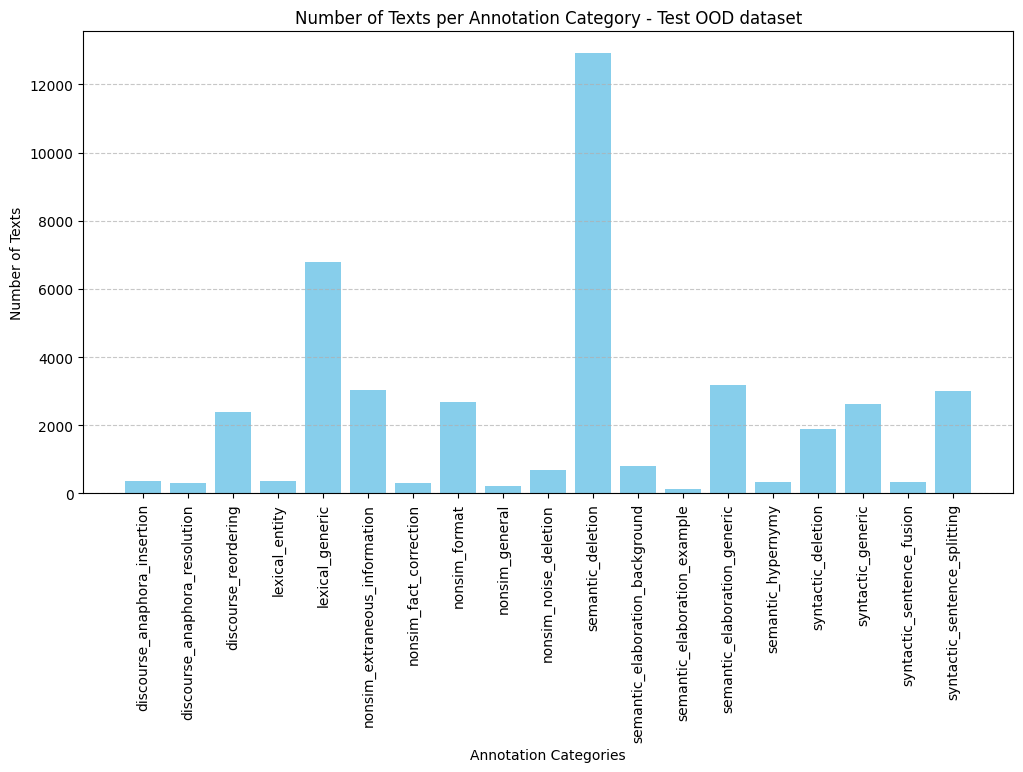

In [30]:
plot_dist(test_ood_counts,"Test OOD dataset")

### All datasets

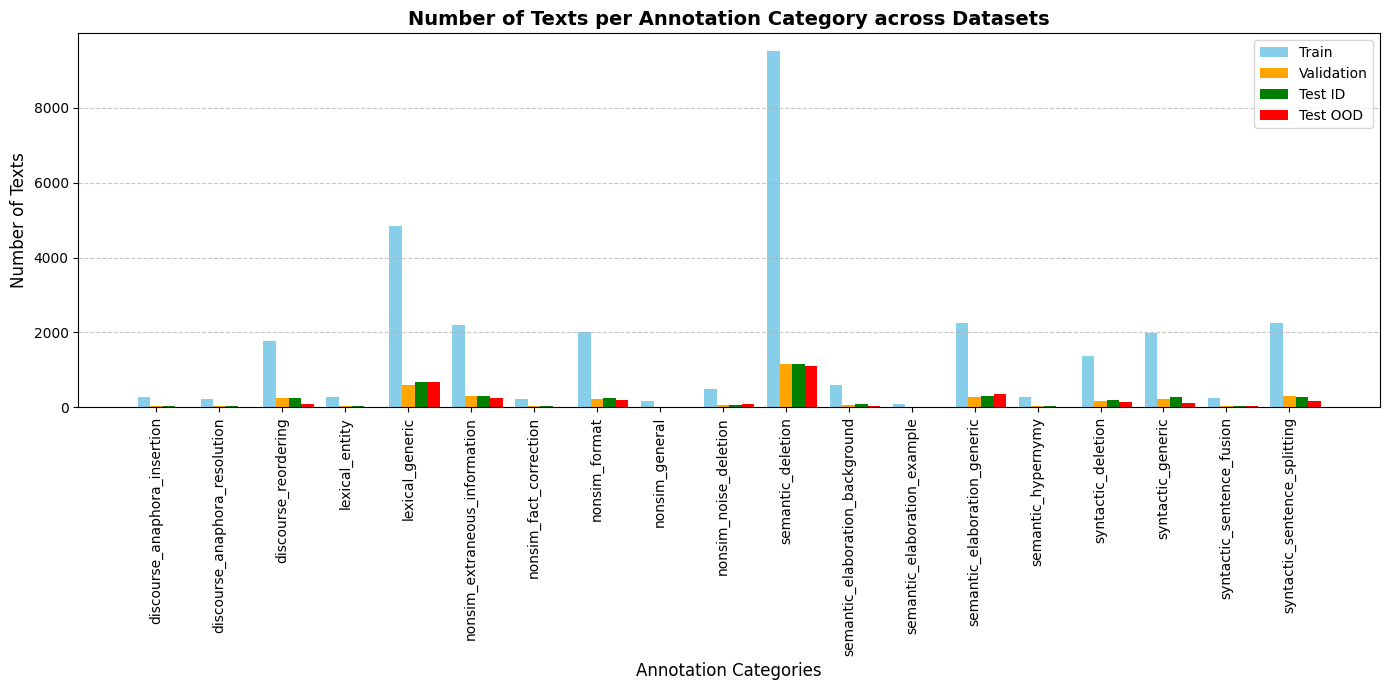

In [33]:
import numpy as np

categories_index = np.arange(len(all_categories))
bar_width = 0.2  

# plot the counts for each dataset
plt.figure(figsize=(14, 7))
plt.bar(categories_index, [train_counts.get(cat, 0) for cat in all_categories], bar_width, label='Train', color='skyblue')
plt.bar(categories_index + bar_width, [val_counts.get(cat, 0) for cat in all_categories], bar_width, label='Validation', color='orange')
plt.bar(categories_index + 2 * bar_width, [test_id_counts.get(cat, 0) for cat in all_categories], bar_width, label='Test ID', color='green')
plt.bar(categories_index + 3 * bar_width, [test_ood_counts.get(cat, 0) for cat in all_categories], bar_width, label='Test OOD', color='red')

# Add labels and title
plt.xlabel('Annotation Categories', fontsize=12)
plt.ylabel('Number of Texts', fontsize=12)
plt.title('Number of Texts per Annotation Category across Datasets', fontsize=14, fontweight='bold')
plt.xticks(categories_index + bar_width, all_categories, rotation=90)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Elaborations

In [44]:
def count_specific_annotations(dataset, specific_categories):
    category_count = defaultdict(int)
    for example in dataset:
        if example['annotations'] is not None:
            if example['annotations']: 
                for annotation in example['annotations']:
                    if annotation['category'] in specific_categories:
                        category_count[annotation['category']] += 1
    return category_count

# eleboration categories
specific_categories = ['semantic_elaboration_background', 'semantic_elaboration_example', 'semantic_elaboration_generic']

# Count for each dataset
train_specific_counts = count_specific_annotations(swipe_dataset['train'], specific_categories)
val_specific_counts = count_specific_annotations(swipe_dataset['validation'], specific_categories)
test_id_specific_counts = count_specific_annotations(swipe_dataset['test_id'], specific_categories)
test_ood_specific_counts = count_specific_annotations(swipe_dataset['test_ood'], specific_categories)

In [45]:
print('semantic_elaboration_generic')
print("Train :", train_specific_counts['semantic_elaboration_generic'])
print("Validation:", val_specific_counts['semantic_elaboration_generic'])
print("Test ID:", test_id_specific_counts['semantic_elaboration_generic'])
print("Test OOD:", test_ood_specific_counts['semantic_elaboration_generic'])

semantic_elaboration_generic
Train : 2260
Validation: 270
Test ID: 295
Test OOD: 356


In [46]:
print('semantic_elaboration_background')
print("Train :", train_specific_counts['semantic_elaboration_background'])
print("Validation:", val_specific_counts['semantic_elaboration_background'])
print("Test ID:", test_id_specific_counts['semantic_elaboration_background'])
print("Test OOD:", test_ood_specific_counts['semantic_elaboration_background'])

semantic_elaboration_background
Train : 604
Validation: 76
Test ID: 81
Test OOD: 39


In [47]:
print('semantic_elaboration_example')
print("Train :", train_specific_counts['semantic_elaboration_example'])
print("Validation:", val_specific_counts['semantic_elaboration_example'])
print("Test ID:", test_id_specific_counts['semantic_elaboration_example'])
print("Test OOD:", test_ood_specific_counts['semantic_elaboration_example'])

semantic_elaboration_example
Train : 98
Validation: 7
Test ID: 20
Test OOD: 13


In [38]:
import matplotlib.pyplot as plt
import numpy as np

def plot_specific_annotation_counts(train_counts, val_counts, test_id_counts, test_ood_counts, specific_categories, category_type):
    categories = specific_categories
    datasets = ['Train', 'Validation', 'Test ID', 'Test OOD']

    # extract counts for each dataset
    train_values = [train_counts.get(cat, 0) for cat in categories]
    val_values = [val_counts.get(cat, 0) for cat in categories]
    test_id_values = [test_id_counts.get(cat, 0) for cat in categories]
    test_ood_values = [test_ood_counts.get(cat, 0) for cat in categories]

    x = np.arange(len(categories))  # category positions on x-axis
    width = 0.2 

    plt.figure(figsize=(10, 6))

    plt.bar(x - 1.5 * width, train_values, width, label='Train', color='skyblue')
    plt.bar(x - 0.5 * width, val_values, width, label='Validation', color='lightgreen')
    plt.bar(x + 0.5 * width, test_id_values, width, label='Test ID', color='lightcoral')
    plt.bar(x + 1.5 * width, test_ood_values, width, label='Test OOD', color='lightyellow')

    plt.xlabel('Annotation Categories')
    plt.ylabel('Number of Annotations')
    plt.title(f'{category_type} Annotations Count across Datasets')
    plt.xticks(x, categories, rotation=45)
    plt.legend()

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

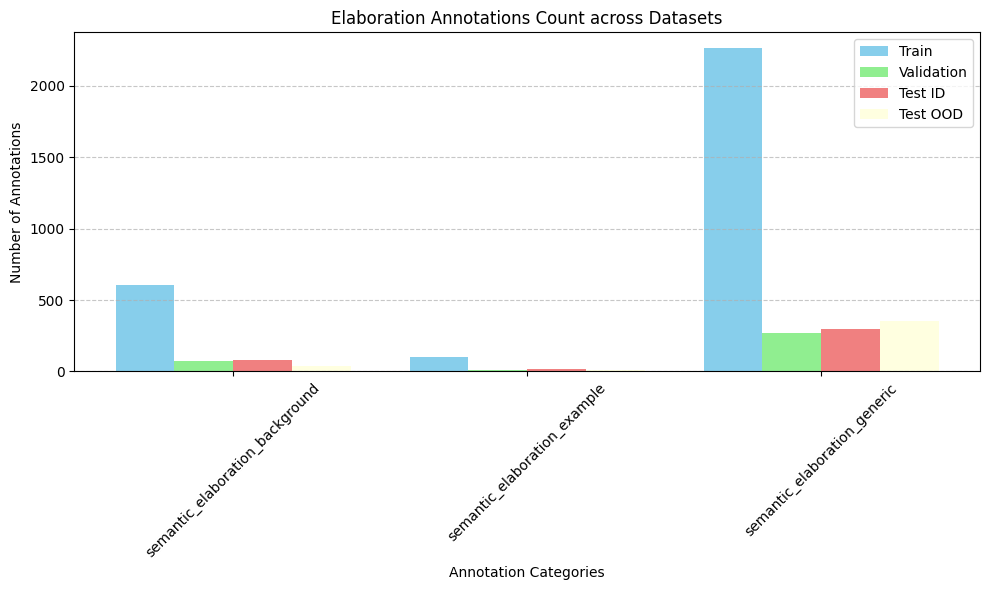

In [39]:
# Plot the counts
plot_specific_annotation_counts(train_specific_counts, val_specific_counts, test_id_specific_counts, test_ood_specific_counts, specific_categories,"Elaboration")

In [4]:
def get_texts_with_specific_annotations(dataset, specific_categories):
    raw_texts = []
    references = []
    annotations = []
    for example in dataset:
        if example['annotations']: 
            for annotation in example['annotations']:
                if annotation['category'] in specific_categories:
                    raw_texts.append(example['r_content'])
                    references.append(example['s_content'])
                    annotations.append(annotation['category'])
    return raw_texts, references, annotations

# eleboration categories
specific_categories = ['semantic_elaboration_background', 'semantic_elaboration_example', 'semantic_elaboration_generic']

# get sample texts
r_contents, s_contents, annotations = get_texts_with_specific_annotations(swipe_dataset['validation'], specific_categories)

In [10]:
for idx in range(30):
    if annotations[idx] == 'semantic_elaboration_background':
        print("Raw:")
        print(r_contents[idx], end='\n\n')
        print("Simplification:")
        print(s_contents[idx], end='\n\n')

Raw:
Fuck is an obscene and profane English-language word which often refers to the act of sexual intercourse but is also commonly used as an intensifier or to denote disdain. While its origin is obscure, it is usually considered to be first attested to around 1475. In modern usage, the term "fuck" and its derivatives (such as "fucker" and "fucking") can be used as a noun, a verb, an adjective, an interjection or an adverb. There are many common phrases that employ the word as well as compounds that incorporate it, such as "motherfucker," "fuckwit" and "fucknut".

Simplification:
Fuck is a slang term for sexual intercourse with someone or an act of sexual intercourse.. Fuck is swear word (an offensive, rude, or impolite word) to most English speakers.

Raw:
70.105.152.229 20:35, 3 December 2006 (UTC) Queen Catherine of England née Catherine Parr (c.1512 – 5 September, 1548), also spelled Katherine, was the Queen Consort of Henry VIII of England (1543–1547). She was the last of his six 